# Wing Fan

## Research question/interests

From this Airbnb listing dataset.**I want to discover the correlation among the time duration of the guests' stay, amenities provided in each suite, and how pricing different for each listing.**
We can learn the demand for the length of stay and price differ for each listing in HongKong, therefore, potential landlords who wish to invest in HongKong renting could fulfill the demands of the renters and maximize the renting occupancy.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [77]:
sns.set_theme(style="ticks",
              font_scale=1.3,)

import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

In [78]:
df=pd.read_csv('../data/raw/listings.csv')
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17891,https://www.airbnb.com/rooms/17891,20221223064914,2022-12-23,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,https://a0.muscache.com/pictures/119686/6ced58...,69063,...,4.93,4.90,4.66,NaN,f,1,1,0,0,0.47
1,72571,https://www.airbnb.com/rooms/72571,20221223064914,2022-12-23,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,https://a0.muscache.com/pictures/2849554/d2262...,304876,...,4.51,4.73,4.13,NaN,f,10,6,4,0,1.05
2,923017,https://www.airbnb.com/rooms/923017,20221223064914,2022-12-23,city scrape,Comfort Home in Prince Edward Mtr 4 beds,A newly renovated apartment located in the ci...,Disneyland Discount ticket<br />Ocean Park Di...,https://a0.muscache.com/pictures/f3913158-fa84...,4971086,...,4.85,4.86,4.75,NaN,t,2,2,0,0,3.03
3,944283,https://www.airbnb.com/rooms/944283,20221223064914,2022-12-23,city scrape,2 Bed Rooms heart of Central SOHO( sleeps 3),"Soho, best Location in Central. Hong Kong.<br ...",Amazing location on Wellington street in Centr...,https://a0.muscache.com/pictures/9ade4292-c83a...,5100812,...,4.72,4.85,4.57,NaN,f,2,1,1,0,0.61
4,956857,https://www.airbnb.com/rooms/956857,20221223064914,2022-12-23,city scrape,large Room- Heart of Soho/Central,Awesome Location in Central.<br />Clean large...,NaN,https://a0.muscache.com/pictures/3ab4ff36-81de...,5100812,...,5.00,5.00,5.00,NaN,f,2,1,1,0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,869969,https://www.airbnb.com/rooms/869969,20221223064914,2022-12-23,city scrape,Studio available in Prince Edward,Studio<br /><br />Building with Lift.<br /><br...,NaN,https://a0.muscache.com/pictures/75172404/ba1b...,4584648,...,4.00,4.00,5.00,NaN,f,383,12,363,8,0.02
5190,870046,https://www.airbnb.com/rooms/870046,20221223064914,2022-12-23,city scrape,10 mins to CITY U --------- by MTR,Fully furnished. No need to worry about any fu...,NaN,https://a0.muscache.com/pictures/69952309/fc7e...,4584648,...,5.00,4.00,4.00,NaN,f,383,12,363,8,0.01
5191,894221,https://www.airbnb.com/rooms/894221,20221223064914,2022-12-23,city scrape,Best room for you near MTR,"Best room 4 u near MTR,<br />-- next to MTR! <...",NaN,https://a0.muscache.com/pictures/62594195/2aa1...,4584648,...,NaN,NaN,NaN,NaN,f,383,12,363,8,NaN
5192,894224,https://www.airbnb.com/rooms/894224,20221223064914,2022-12-23,city scrape,Tsimshatsui Room in Flat Share,My place is close to restaurants and dining an...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4584648,...,NaN,NaN,NaN,NaN,f,383,12,363,8,0.01


In [79]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17891,https://www.airbnb.com/rooms/17891,20221223064914,2022-12-23,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,https://a0.muscache.com/pictures/119686/6ced58...,69063,...,4.93,4.90,4.66,NaN,f,1,1,0,0,0.47
1,72571,https://www.airbnb.com/rooms/72571,20221223064914,2022-12-23,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,https://a0.muscache.com/pictures/2849554/d2262...,304876,...,4.51,4.73,4.13,NaN,f,10,6,4,0,1.05
2,923017,https://www.airbnb.com/rooms/923017,20221223064914,2022-12-23,city scrape,Comfort Home in Prince Edward Mtr 4 beds,A newly renovated apartment located in the ci...,Disneyland Discount ticket<br />Ocean Park Di...,https://a0.muscache.com/pictures/f3913158-fa84...,4971086,...,4.85,4.86,4.75,NaN,t,2,2,0,0,3.03
3,944283,https://www.airbnb.com/rooms/944283,20221223064914,2022-12-23,city scrape,2 Bed Rooms heart of Central SOHO( sleeps 3),"Soho, best Location in Central. Hong Kong.<br ...",Amazing location on Wellington street in Centr...,https://a0.muscache.com/pictures/9ade4292-c83a...,5100812,...,4.72,4.85,4.57,NaN,f,2,1,1,0,0.61
4,956857,https://www.airbnb.com/rooms/956857,20221223064914,2022-12-23,city scrape,large Room- Heart of Soho/Central,Awesome Location in Central.<br />Clean large...,NaN,https://a0.muscache.com/pictures/3ab4ff36-81de...,5100812,...,5.00,5.00,5.00,NaN,f,2,1,1,0,0.04


In [80]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [81]:
df.nunique(axis=0)

id                                              5194
listing_url                                     5194
scrape_id                                          1
last_scraped                                       1
source                                             2
                                                ... 
calculated_host_listings_count                    43
calculated_host_listings_count_entire_homes       26
calculated_host_listings_count_private_rooms      33
calculated_host_listings_count_shared_rooms       14
reviews_per_month                                338
Length: 75, dtype: int64

In [82]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,0.000000,5194.000000,5194.000000,5194.000000,0.000000,...,2511.000000,2510.000000,2511.000000,2511.000000,0.000000,5194.000000,5194.000000,5194.000000,5194.000000,2543.000000
mean,104180044199799264.000000,20221223064914.000000,99527082.774548,121.021756,148.982095,nan,22.296253,114.161216,2.602233,nan,...,4.692732,4.695351,4.741641,4.479837,nan,105.182133,14.515787,82.769157,7.595302,0.722375
std,248610801834706112.000000,0.000000,115094918.852142,161.198674,200.223614,nan,0.034002,0.049359,2.159186,nan,...,0.561899,0.559082,0.451648,0.639978,nan,144.708172,27.182154,130.464544,16.352671,1.030108
min,17891.000000,20221223064914.000000,63038.000000,1.000000,1.000000,nan,22.191250,113.856340,0.000000,nan,...,0.000000,1.000000,1.000000,1.000000,nan,1.000000,0.000000,0.000000,0.000000,0.010000
25%,21106946.750000,20221223064914.000000,12922210.750000,3.000000,5.000000,nan,22.280300,114.153690,1.250000,nan,...,4.660000,4.650000,4.670000,4.340000,nan,3.000000,1.000000,0.000000,0.000000,0.100000
50%,34290062.000000,20221223064914.000000,58862332.000000,21.000000,29.000000,nan,22.291910,114.171260,2.000000,nan,...,4.870000,4.880000,4.880000,4.640000,nan,18.000000,3.000000,5.000000,0.000000,0.340000
75%,45789470.000000,20221223064914.000000,138649185.000000,293.000000,384.000000,nan,22.310880,114.180460,3.000000,nan,...,5.000000,5.000000,5.000000,4.870000,nan,255.000000,15.000000,230.000000,8.000000,0.960000
max,787199569053724672.000000,20221223064914.000000,491510217.000000,449.000000,737.000000,nan,22.528410,114.362470,16.000000,nan,...,5.000000,5.000000,5.000000,5.000000,nan,383.000000,118.000000,363.000000,62.000000,11.440000


In [83]:
df.price.unique()

array(['$1,400.00', '$577.00', '$1,036.00', ..., '$1,024.00', '$1,169.00',
       '$487.00'], dtype=object)

In [84]:
df.amenities.unique()

array(['["Pets allowed", "Fire pit", "Refrigerator", "Outdoor furniture", "Long term stays allowed", "AC - split type ductless system", "Coffee maker", "Washer", "TV", "Elevator", "Kitchen", "Dedicated workspace", "Wifi"]',
       '["Kitchen", "Long term stays allowed", "Washer", "Fire extinguisher", "Air conditioning", "Dedicated workspace", "Wifi", "TV with standard cable", "Heating"]',
       '["Children\\u2019s books and toys", "Self check-in", "Carbon monoxide alarm", "Long term stays allowed", "Elevator", "Shampoo", "Hair dryer", "Bed linens", "Free street parking", "Refrigerator", "Baby bath", "Dishes and silverware", "Dryer", "Kitchen", "Smart lock", "Microwave", "Window guards", "Iron", "Crib", "Heating", "Cooking basics", "EV charger", "Hot water", "Single level home", "Security cameras on property", "Essentials", "Washer", "Air conditioning", "Wifi", "TV with standard cable", "Hangers", "Smoke alarm", "Fire extinguisher", "Stove"]',
       ...,
       '["Pets allowed", "Kitc

In [85]:
count_series = df['amenities'].value_counts()
print(count_series)

["Long term stays allowed", "Kitchen", "Air conditioning", "Iron", "Wifi"]                                                                                                                                                                                                                                                                                                                                                             387
["Hangers", "Long term stays allowed", "Washer", "Kitchen", "Air conditioning", "Iron", "Wifi"]                                                                                                                                                                                                                                                                                                                                         41
["Hangers", "Long term stays allowed", "Elevator", "Washer", "Kitchen", "Air conditioning", "Wifi"]                                               

In [86]:
df['amenities'] = df['amenities'].str.lower()
df['variables'] = df['amenities'].str.split(',')
count_list = {}
for index, row in df.iterrows():
    for variable in row['variables']:
        variable = variable.strip()
        if variable in count_list:
            count_list[variable] += 1
        else:
            count_list[variable] =1

In [87]:
sorted_count_list = sorted(count_list.items(), key=lambda x:x[1], reverse = True)

In [88]:
print(df.dtypes)

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
variables                                        object
Length: 76, dtype: object


In [89]:
df1 = pd.DataFrame(sorted_count_list, columns=['amenities', 'quantity'])

df1.to_csv("../data/raw/listing_Wing_processed2.csv", index=None)
df1

,amenities,quantity
0,"""air conditioning""",4414
1,"""long term stays allowed""",4042
2,"""essentials""",3113
3,"""hangers""",2939
4,"""kitchen""",2863
...,...,...
955,"""40\"" hdtv with standard cable""",1
956,"""50\"" hdtv with dvd player""",1
957,"""mannings body soap""",1
958,"""mannings conditioner""",1


In [90]:
df1['quantity'] = pd.to_numeric(df1['quantity'])

In [91]:
print(df1.dtypes)

amenities    object
quantity      int64
dtype: object


In [92]:

df2 = df1.nlargest(20, ['quantity'])
df2

,amenities,quantity
0,"""air conditioning""",4414
1,"""long term stays allowed""",4042
2,"""essentials""",3113
3,"""hangers""",2939
4,"""kitchen""",2863
5,"""hair dryer""",2822
6,"""elevator""",2604
7,"""tv""",2598
8,"""shampoo""",2570
9,"""iron""",2546


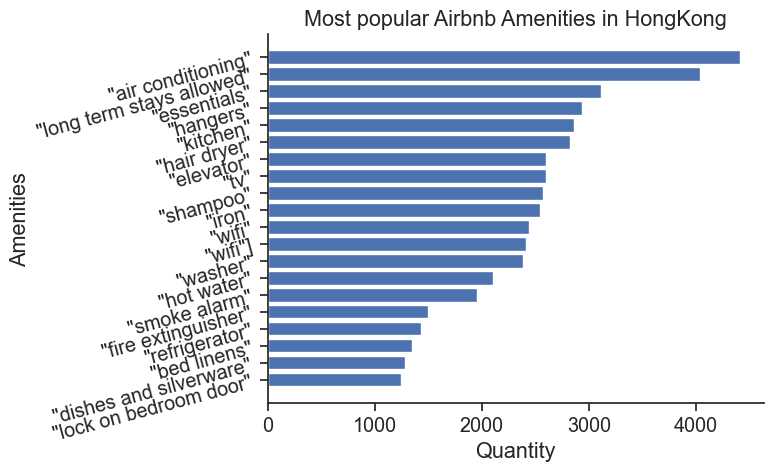

<Figure size 20000x10000 with 0 Axes>

In [93]:
df2 = df2.sort_values('quantity', ascending=True)

plt.barh(df2['amenities'], df2['quantity'])
plt.xlabel('Quantity')
plt.ylabel('Amenities')
plt.title('Most popular Airbnb Amenities in HongKong')
plt.yticks(rotation=15)
plt.figure(figsize=(200,100))

plt.show()


#### From this graph, we can see that 'air conditioning' is one of the most demanding amenities in HongKong Airbnb listings, 'long term stays allowed' is at the second place. However, we can refer to the earlier 5194 listings in HongKong airbnb, only around 4414 of the HongKong airbnb listings have AC. Some other interesting discovery is that amenities such as 'lock on bedroom door' is also in the top 20 amenities essential for the Hong Kong Airbnb customers. 

In [94]:
df.minimum_nights.unique()

array([  60,    2,    1,    4,   13,    6,   30,   31,   29,    3,    7,
          5,   20,   28,   90,   14,   10,   32,   15,  119,  120,   61,
         21,   62,  365,  180,   25,   27,   94,   88,  190,  100,   26,
        299,   22,  182,  300,    8,  600,  250,   86,   39,   35,    9,
         12,   50,   45,  360,   19,   18, 1125])

In [95]:
df_cleaned = df.drop(['scrape_id', 'last_scraped', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url','neighbourhood_group_cleansed'], axis=1)

In [96]:
df_cleaned.dropna(axis=0)
df_cleaned.shape

(5194, 69)

In [97]:
df.minimum_nights.unique()

array([  60,    2,    1,    4,   13,    6,   30,   31,   29,    3,    7,
          5,   20,   28,   90,   14,   10,   32,   15,  119,  120,   61,
         21,   62,  365,  180,   25,   27,   94,   88,  190,  100,   26,
        299,   22,  182,  300,    8,  600,  250,   86,   39,   35,    9,
         12,   50,   45,  360,   19,   18, 1125])

In [98]:
periods = ["short vacation", "long vacation", "short accomodation", "long accomodation", "long rentals"]
min_nights =[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   12,
         13,   14,   15,   18,   19,   20,   21,   22,   25,   26,   27,
         28,   29,   30,   31,   32,   35,   39,   45,   50,   60,   61,
         62,   86,   88,   90,   94,  100,  119,  120,  180,  182,  190,
        250,  299,  300,  360,  365,  600, 1125] 

periods_stay = pd.cut(min_nights, [0,7, 15, 30, 90, 1125], labels= periods)
pd.value_counts(periods_stay)
           

long rentals          14
long accomodation     12
short accomodation    11
short vacation         7
long vacation          7
dtype: int64

In [99]:
df_cleaned

,id,listing_url,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,variables
0,17891,https://www.airbnb.com/rooms/17891,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,69063,Candace,2010-01-09,"Los Angeles, CA",...,4.90,4.66,NaN,f,1,1,0,0,0.47,"[[""pets allowed"", ""fire pit"", ""refrigerator""..."
1,72571,https://www.airbnb.com/rooms/72571,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,304876,Brend,2010-11-30,Hong Kong,...,4.73,4.13,NaN,f,10,6,4,0,1.05,"[[""kitchen"", ""long term stays allowed"", ""was..."
2,923017,https://www.airbnb.com/rooms/923017,city scrape,Comfort Home in Prince Edward Mtr 4 beds,A newly renovated apartment located in the ci...,Disneyland Discount ticket<br />Ocean Park Di...,4971086,Alice,2013-02-05,Hong Kong,...,4.86,4.75,NaN,t,2,2,0,0,3.03,"[[""children\u2019s books and toys"", ""self che..."
3,944283,https://www.airbnb.com/rooms/944283,city scrape,2 Bed Rooms heart of Central SOHO( sleeps 3),"Soho, best Location in Central. Hong Kong.<br ...",Amazing location on Wellington street in Centr...,5100812,Nana,2013-02-15,Hong Kong,...,4.85,4.57,NaN,f,2,1,1,0,0.61,"[[""carbon monoxide alarm"", ""long term stays a..."
4,956857,https://www.airbnb.com/rooms/956857,city scrape,large Room- Heart of Soho/Central,Awesome Location in Central.<br />Clean large...,NaN,5100812,Nana,2013-02-15,Hong Kong,...,5.00,5.00,NaN,f,2,1,1,0,0.04,"[[""carbon monoxide alarm"", ""long term stays a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,869969,https://www.airbnb.com/rooms/869969,city scrape,Studio available in Prince Edward,Studio<br /><br />Building with Lift.<br /><br...,NaN,4584648,Ivy,2013-01-04,Hong Kong,...,4.00,5.00,NaN,f,383,12,363,8,0.02,"[[""air conditioning"", ""wifi"", ""long term sta..."
5190,870046,https://www.airbnb.com/rooms/870046,city scrape,10 mins to CITY U --------- by MTR,Fully furnished. No need to worry about any fu...,NaN,4584648,Ivy,2013-01-04,Hong Kong,...,4.00,4.00,NaN,f,383,12,363,8,0.01,"[[""long term stays allowed"", ""washer"", ""tv"",..."
5191,894221,https://www.airbnb.com/rooms/894221,city scrape,Best room for you near MTR,"Best room 4 u near MTR,<br />-- next to MTR! <...",NaN,4584648,Ivy,2013-01-04,Hong Kong,...,NaN,NaN,NaN,f,383,12,363,8,NaN,"[[""long term stays allowed"", ""washer"", ""drye..."
5192,894224,https://www.airbnb.com/rooms/894224,city scrape,Tsimshatsui Room in Flat Share,My place is close to restaurants and dining an...,NaN,4584648,Ivy,2013-01-04,Hong Kong,...,NaN,NaN,NaN,f,383,12,363,8,0.01,"[[""long term stays allowed"", ""washer"", ""tv"",..."


In [100]:
def minimum_nights(x):
    if x <= 7:
        return ('short vacation')
    elif x <= 15:
        return ('long vacation')
    elif x <= 30:
        return ('short accomodation')
    elif x <= 90:
        return ('long accomodation')
    else:
        return ('long rentals')

df_cleaned['vacation_type'] = df['minimum_nights'].apply(minimum_nights)
df_cleaned.head() 

,id,listing_url,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,variables,vacation_type
0,17891,https://www.airbnb.com/rooms/17891,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,69063,Candace,2010-01-09,"Los Angeles, CA",...,4.66,NaN,f,1,1,0,0,0.47,"[[""pets allowed"", ""fire pit"", ""refrigerator""...",long accomodation
1,72571,https://www.airbnb.com/rooms/72571,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,304876,Brend,2010-11-30,Hong Kong,...,4.13,NaN,f,10,6,4,0,1.05,"[[""kitchen"", ""long term stays allowed"", ""was...",short vacation
2,923017,https://www.airbnb.com/rooms/923017,city scrape,Comfort Home in Prince Edward Mtr 4 beds,A newly renovated apartment located in the ci...,Disneyland Discount ticket<br />Ocean Park Di...,4971086,Alice,2013-02-05,Hong Kong,...,4.75,NaN,t,2,2,0,0,3.03,"[[""children\u2019s books and toys"", ""self che...",short vacation
3,944283,https://www.airbnb.com/rooms/944283,city scrape,2 Bed Rooms heart of Central SOHO( sleeps 3),"Soho, best Location in Central. Hong Kong.<br ...",Amazing location on Wellington street in Centr...,5100812,Nana,2013-02-15,Hong Kong,...,4.57,NaN,f,2,1,1,0,0.61,"[[""carbon monoxide alarm"", ""long term stays a...",short vacation
4,956857,https://www.airbnb.com/rooms/956857,city scrape,large Room- Heart of Soho/Central,Awesome Location in Central.<br />Clean large...,NaN,5100812,Nana,2013-02-15,Hong Kong,...,5.00,NaN,f,2,1,1,0,0.04,"[[""carbon monoxide alarm"", ""long term stays a...",long vacation


In [101]:
counts = df_cleaned['vacation_type'].value_counts()
counts

short vacation        2438
short accomodation    2231
long accomodation      278
long vacation          155
long rentals            92
Name: vacation_type, dtype: int64

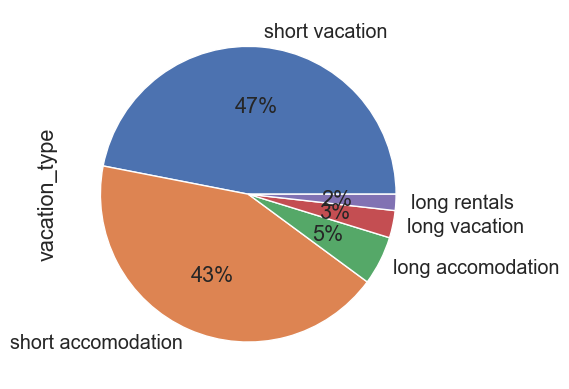

In [102]:
counts.plot.pie(autopct='%1.0f%%')
plt.show()

#### from this pie chart, we can see that 'short vacation' and 'short accomodation' is the most popular minimum_days of the rental available in HongKong Airbnb market. It consist almost 70% of the entire HongKong Airbnb rentals. 
#### After adding the percentage to the pie chart, we are more clear that short vacation (0-7 days)  is more popular than short accomodation (15-30 days). 

In [103]:
df_cleaned.shape

(5194, 70)

In [104]:
df_cleaned

,id,listing_url,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,variables,vacation_type
0,17891,https://www.airbnb.com/rooms/17891,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,69063,Candace,2010-01-09,"Los Angeles, CA",...,4.66,NaN,f,1,1,0,0,0.47,"[[""pets allowed"", ""fire pit"", ""refrigerator""...",long accomodation
1,72571,https://www.airbnb.com/rooms/72571,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,304876,Brend,2010-11-30,Hong Kong,...,4.13,NaN,f,10,6,4,0,1.05,"[[""kitchen"", ""long term stays allowed"", ""was...",short vacation
2,923017,https://www.airbnb.com/rooms/923017,city scrape,Comfort Home in Prince Edward Mtr 4 beds,A newly renovated apartment located in the ci...,Disneyland Discount ticket<br />Ocean Park Di...,4971086,Alice,2013-02-05,Hong Kong,...,4.75,NaN,t,2,2,0,0,3.03,"[[""children\u2019s books and toys"", ""self che...",short vacation
3,944283,https://www.airbnb.com/rooms/944283,city scrape,2 Bed Rooms heart of Central SOHO( sleeps 3),"Soho, best Location in Central. Hong Kong.<br ...",Amazing location on Wellington street in Centr...,5100812,Nana,2013-02-15,Hong Kong,...,4.57,NaN,f,2,1,1,0,0.61,"[[""carbon monoxide alarm"", ""long term stays a...",short vacation
4,956857,https://www.airbnb.com/rooms/956857,city scrape,large Room- Heart of Soho/Central,Awesome Location in Central.<br />Clean large...,NaN,5100812,Nana,2013-02-15,Hong Kong,...,5.00,NaN,f,2,1,1,0,0.04,"[[""carbon monoxide alarm"", ""long term stays a...",long vacation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,869969,https://www.airbnb.com/rooms/869969,city scrape,Studio available in Prince Edward,Studio<br /><br />Building with Lift.<br /><br...,NaN,4584648,Ivy,2013-01-04,Hong Kong,...,5.00,NaN,f,383,12,363,8,0.02,"[[""air conditioning"", ""wifi"", ""long term sta...",short accomodation
5190,870046,https://www.airbnb.com/rooms/870046,city scrape,10 mins to CITY U --------- by MTR,Fully furnished. No need to worry about any fu...,NaN,4584648,Ivy,2013-01-04,Hong Kong,...,4.00,NaN,f,383,12,363,8,0.01,"[[""long term stays allowed"", ""washer"", ""tv"",...",short accomodation
5191,894221,https://www.airbnb.com/rooms/894221,city scrape,Best room for you near MTR,"Best room 4 u near MTR,<br />-- next to MTR! <...",NaN,4584648,Ivy,2013-01-04,Hong Kong,...,NaN,NaN,f,383,12,363,8,NaN,"[[""long term stays allowed"", ""washer"", ""drye...",short accomodation
5192,894224,https://www.airbnb.com/rooms/894224,city scrape,Tsimshatsui Room in Flat Share,My place is close to restaurants and dining an...,NaN,4584648,Ivy,2013-01-04,Hong Kong,...,NaN,NaN,f,383,12,363,8,0.01,"[[""long term stays allowed"", ""washer"", ""tv"",...",long accomodation


In [105]:
df_cleaned['price'] = df_cleaned['price'].astype(str)
df_cleaned['price'].str.upper()

0       $1,400.00
1         $577.00
2       $1,036.00
3         $930.00
4         $351.00
          ...    
5189      $217.00
5190      $180.00
5191      $180.00
5192      $140.00
5193      $180.00
Name: price, Length: 5194, dtype: object

In [106]:
fixed=df_cleaned[["amenities", "price", "minimum_nights", "vacation_type"]]
fixed.to_csv("../data/raw/listing_Wing_processed.csv", index=None)
fixed

,amenities,price,minimum_nights,vacation_type
0,"[""pets allowed"", ""fire pit"", ""refrigerator"", ""...","$1,400.00",60,long accomodation
1,"[""kitchen"", ""long term stays allowed"", ""washer...",$577.00,2,short vacation
2,"[""children\u2019s books and toys"", ""self check...","$1,036.00",1,short vacation
3,"[""carbon monoxide alarm"", ""long term stays all...",$930.00,4,short vacation
4,"[""carbon monoxide alarm"", ""long term stays all...",$351.00,13,long vacation
...,...,...,...,...
5189,"[""air conditioning"", ""wifi"", ""long term stays ...",$217.00,30,short accomodation
5190,"[""long term stays allowed"", ""washer"", ""tv"", ""k...",$180.00,30,short accomodation
5191,"[""long term stays allowed"", ""washer"", ""dryer"",...",$180.00,30,short accomodation
5192,"[""long term stays allowed"", ""washer"", ""tv"", ""k...",$140.00,31,long accomodation


In [107]:
counts = df_cleaned['vacation_type'].value_counts()
counts

short vacation        2438
short accomodation    2231
long accomodation      278
long vacation          155
long rentals            92
Name: vacation_type, dtype: int64

In [108]:
print(fixed.dtypes)

amenities         object
price             object
minimum_nights     int64
vacation_type     object
dtype: object


In [109]:
fixed['price'] = fixed['price'].astype(str)
fixed['price'] = fixed['price'].astype(float)

/var/folders/vd/bhj2gqxs6mv5376z6_rbkyth0000gn/T/ipykernel_33123/3751611401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed['price'] = fixed['price'].astype(str)


ValueError: could not convert string to float: '$1,400.00'

In [ ]:
fixed['price'] = fixed['price'].astype(float)

In [ ]:
counts_means = fixed.groupby('vacation_type')['price'].mean()
counts_means

In [ ]:
plt.boxplot([fixed[fixed['vacation_type'] == 'short vacation']['price'],
           fixed[fixed['vacation_type'] == 'long vacation']['price'],
            fixed[fixed['vacation_type'] == 'short accomodation']['price'],
               fixed[fixed['vacation_type'] == 'long accomodation']['price'],
                 fixed[fixed['vacation_type'] == 'long rentals']['price']])
plt.title('Price by Vacation type')
plt.ylabel('Price')
plt.xticks([1,2,3,4,5],['short vacation', 'long vacation', 'short accomodation', 'long accomodation', 'long rentals'])
plt.xticks(rotation=45)
plt.yticks([0, 100000, 200000, 300000, 400000, 500000], ['0', '1000.00', '2000.00', '3000.00', '4000.00', '5000.00'])
plt.figure(figsize=(20,10))
plt.show()


In [ ]:
plt.boxplot([fixed[fixed['vacation_type'] == 'short vacation']['price'],
            fixed[fixed['vacation_type'] == 'long vacation']['price'],
            fixed[fixed['vacation_type'] == 'short accomodation']['price'],
               fixed[fixed['vacation_type'] == 'long accomodation']['price'],
                 fixed[fixed['vacation_type'] == 'long rentals']['price']])
plt.title('Price by Vacation type')
plt.ylabel('Price')
plt.xticks([1,2,3,4,5],['short vacation', 'long vacation', 'short accomodation', 'long accomodation', 'long rentals'])
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 500000, 2000))
plt.ylim(0,20000)
plt.figure(figsize=(20,10))
plt.show()

#### As we zoom into the previous boxplot, it is more visualizable and clear that the short vacation pricerange has a wider variation and higher mean price among all. Likewise, the outliers indicates that there are some higher price short vacation Airbnb listings in HongKong. Short-term accomodation is the second most popular rental options in HongKong. 

### Milestone3 Task2 
#### The columns and dataset that I chose, is very limited to create my graphs. Since the 'amenities' columns is mainly strings and unable to used for plotting charts. Hence, it is difficult to draw connection to amenities, duration of stays and prices together visually. However, after grouping the variable, and count it. it becomes more visualizable. I will still stick to my current analysis question. 

### Milestone4 Task2

In [112]:
import pandas as pd
import numpy as np

In [113]:
dfx = (
    pd.read_csv('../data/raw/listings.csv', usecols= ['amenities', 'price', 'minimum_nights'])
    .sort_values("minimum_nights", ascending=False)
    .rename(columns={"minimum_nights": "minnights"})
    .query("minnights > 1")
    .reset_index(drop=True)
    .dropna())

dfx

,amenities,price,minnights
0,"[""Long term stays allowed"", ""Elevator"", ""Washe...","$1,000.00",1125
1,"[""Hot water"", ""Lock on bedroom door"", ""Hangers...",$400.00,600
2,"[""Hot water"", ""Hangers"", ""Long term stays allo...",$400.00,365
3,"[""Pets allowed"", ""Private entrance"", ""Fire ext...",$600.00,365
4,"[""Hot water"", ""Long term stays allowed"", ""Esse...",$180.00,365
...,...,...,...
3685,"[""Self check-in"", ""Carbon monoxide alarm"", ""Lo...",$402.00,2
3686,"[""Induction stove"", ""Paid resort access"", ""Gar...","$1,200.00",2
3687,"[""Long term stays allowed"", ""Coffee maker"", ""W...",$890.00,2
3688,"[""Children\u2019s books and toys"", ""Self check...","$2,200.00",2


In [120]:
def load_and_process(url_or_path_to_csv_file):
    dfx = (
        pd.read_csv('../data/processed/wingfixed.csv')
        .sort_values("minimum_nights", ascending=False)
        .rename(columns={"minimum_nights": "minnights"})
        .query("minnights > 1")
        .reset_index(drop=True))

    dfy = (dfx)
    
    return dfy

In [121]:
dfx

,amenities,price,minnights
0,"[""Long term stays allowed"", ""Elevator"", ""Washe...","$1,000.00",1125
1,"[""Hot water"", ""Lock on bedroom door"", ""Hangers...",$400.00,600
2,"[""Hot water"", ""Hangers"", ""Long term stays allo...",$400.00,365
3,"[""Pets allowed"", ""Private entrance"", ""Fire ext...",$600.00,365
4,"[""Hot water"", ""Long term stays allowed"", ""Esse...",$180.00,365
...,...,...,...
3685,"[""Self check-in"", ""Carbon monoxide alarm"", ""Lo...",$402.00,2
3686,"[""Induction stove"", ""Paid resort access"", ""Gar...","$1,200.00",2
3687,"[""Long term stays allowed"", ""Coffee maker"", ""W...",$890.00,2
3688,"[""Children\u2019s books and toys"", ""Self check...","$2,200.00",2


In [119]:
dfx.to_csv("../data/processed/wingfixed.csv", index=None)

In [116]:
import sys
sys.path.append("../analysis/code")
import project_functions1 

In [122]:
pf1 = project_functions1.load_and_process('code/project_functions1.py')
pf1

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,634726,https://www.airbnb.com/rooms/634726,20221223064914,2022-12-23,previous scrape,"BIG 3BR APT IN WANCHAI, HEART OF HK",<b>The space</b><br />Nicely furnished 3 bedro...,NaN,https://a0.muscache.com/pictures/8139765/aef2b...,3161756,...,4.83,4.89,4.50,NaN,f,1,1,0,0,0.15
1,31076965,https://www.airbnb.com/rooms/31076965,20221223064914,2022-12-23,previous scrape,#3 Family room 5min to West Kowloon/Austin sta...,房間位置<br />佐敦文匯街文景樓後座<br />——————————<br />距離柯士...,NaN,https://a0.muscache.com/pictures/bdf70f9f-4a5e...,23141755,...,4.86,4.73,4.84,NaN,f,25,14,11,0,1.05
2,38364713,https://www.airbnb.com/rooms/38364713,20221223064914,2022-12-23,previous scrape,##2 (月租房monthly rent) Near Yau Ma Tei Station,NaN,NaN,https://a0.muscache.com/pictures/3427d7dd-18ec...,23141755,...,5.00,5.00,5.00,NaN,f,25,14,11,0,0.03
3,20452534,https://www.airbnb.com/rooms/20452534,20221223064914,2022-12-23,city scrape,Wan Chai 1-min to MTR (4 persons),a) Flat w/rooftops<br />b) Equipped with so...,NaN,https://a0.muscache.com/pictures/acb9fccc-d7c7...,145990519,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,52523475,https://www.airbnb.com/rooms/52523475,20221223064914,2022-12-23,city scrape,"中環最貴地段，安靜乾淨光亮，有電梯，新裝8分鐘到地鐵站,舒服單人房，上網",NaN,NaN,https://a0.muscache.com/pictures/f503c5d6-df43...,9938700,...,NaN,NaN,NaN,NaN,f,2,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,14243542,https://www.airbnb.com/rooms/14243542,20221223064914,2022-12-23,city scrape,"1 min MTR, budget single room","**New facilities (free)**<br />Netflix, 24-hou...",Nuts Studio located at the converging point of...,https://a0.muscache.com/pictures/3bf93781-a360...,31947768,...,4.81,4.82,4.46,NaN,t,25,4,21,0,0.98
3686,758988633619247674,https://www.airbnb.com/rooms/758988633619247674,20221223064914,2022-12-23,city scrape,Modern 2 bed apartment,"A stylish apartment with modern kitchen, bathr...",Located in a quiet neighborhood with a park fo...,https://a0.muscache.com/pictures/d3693b27-ae1a...,485624917,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3687,759073476660092242,https://www.airbnb.com/rooms/759073476660092242,20221223064914,2022-12-23,city scrape,"Spacious 3 bedrooms in Central, right by escal...","3 bedrooms flat in Central, right by escalator...",NaN,https://a0.muscache.com/pictures/591022c7-d122...,7478169,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
3688,759144758541368736,https://www.airbnb.com/rooms/759144758541368736,20221223064914,2022-12-23,city scrape,Shek O Village 1bed House w/Ocean View Rooftop,A short distance but a million miles away from...,The Village House is a short walk to Daphne Pi...,https://a0.muscache.com/pictures/e980874c-1e3c...,20206900,...,5.00,5.00,5.00,NaN,f,1,1,0,0,2.73
